<a href="https://colab.research.google.com/github/dsaptoaji25/Student-Distraction-and-Social-Media-Addiction-Project/blob/main/Students_Social_Media_Addiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connecting Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Dataset

In [ ]:
# Importing Students Social Media Addiction dataset
students_social_media = pd.read_csv('/content/drive/MyDrive/Project Study Case 3/Students Social Media Addiction.csv', delimiter=';', on_bad_lines='skip')

# Examining the first few lines of data
print("\nFirst Five Lines of Data:")
print(students_social_media.head())

# Information about data types and encoding schemes
print("\nData Information:")
print(students_social_media.info())

# Descriptive statistics for numerical data
print("\nDescriptive Statistics:")
print(students_social_media.describe())

# Checking for Duplicate Data
duplicate_rows_students_social_media = students_social_media.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows_students_social_media}")


First Five Lines of Data:
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship

#Cleaning Dataframe

In [ ]:
# Trimming whitespace from all string columns in the DataFrame
for col in students_social_media.columns:
  if students_social_media[col].dtype == 'object':
    students_social_media[col] = students_social_media[col].str.strip()

# Post-Cleaning Data Overview:
print("\nPost-Cleaning Data Details:")
print(students_social_media.info())


Post-Cleaning Data Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 n

#Main Analysis

##Section 1: Key Trends

###Age, Gender, and Academic Level Distribution

/tmp/ipython-input-3635659262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=students_social_media, x='Age', palette='viridis')


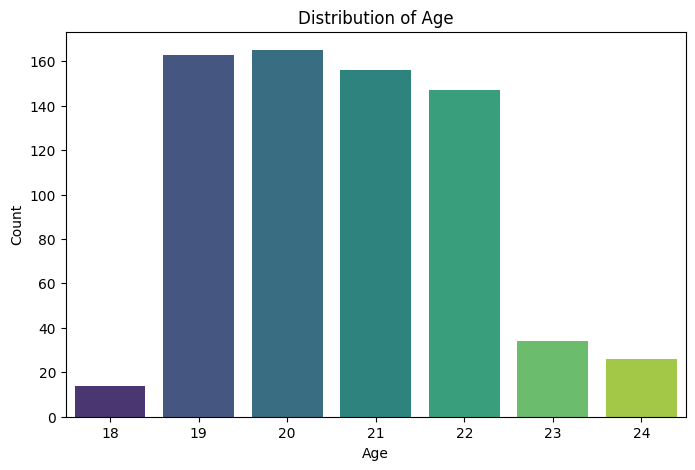

/tmp/ipython-input-3635659262.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=students_social_media, x='Gender', palette='viridis')


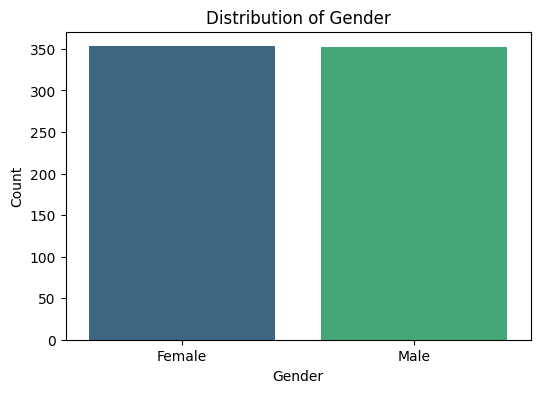

/tmp/ipython-input-3635659262.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=students_social_media, x='Academic_Level', palette='viridis')


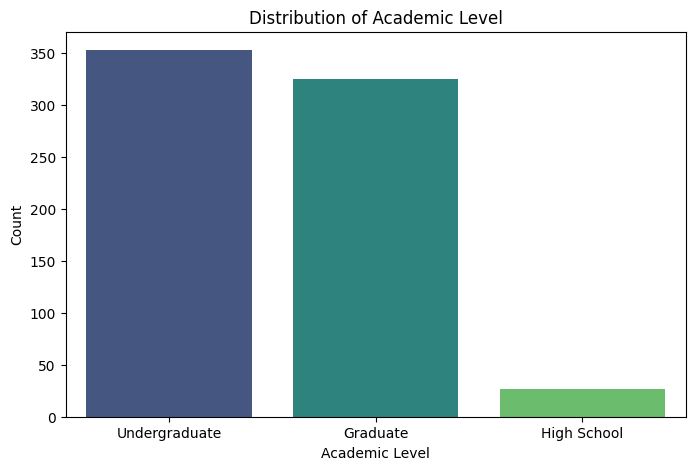

In [ ]:
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.countplot(data=students_social_media, x='Age', palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution of Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=students_social_media, x='Gender', palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Distribution of Academic Level
plt.figure(figsize=(8, 5))
sns.countplot(data=students_social_media, x='Academic_Level', palette='viridis')
plt.title('Distribution of Academic Level')
plt.xlabel('Academic Level')
plt.ylabel('Count')
plt.show()

In [ ]:
print("\nDistribution of Age:")
print(students_social_media['Age'].value_counts().sort_index())

print("\nDistribution of Gender:")
print(students_social_media['Gender'].value_counts())

print("\nDistribution of Academic Level:")
print(students_social_media['Academic_Level'].value_counts())


Distribution of Age:
Age
18     14
19    163
20    165
21    156
22    147
23     34
24     26
Name: count, dtype: int64

Distribution of Gender:
Gender
Female    353
Male      352
Name: count, dtype: int64

Distribution of Academic Level:
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64


###The Most used Social Media Platform

/tmp/ipython-input-3074375183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_usage.index, y=platform_usage.values, palette='viridis')


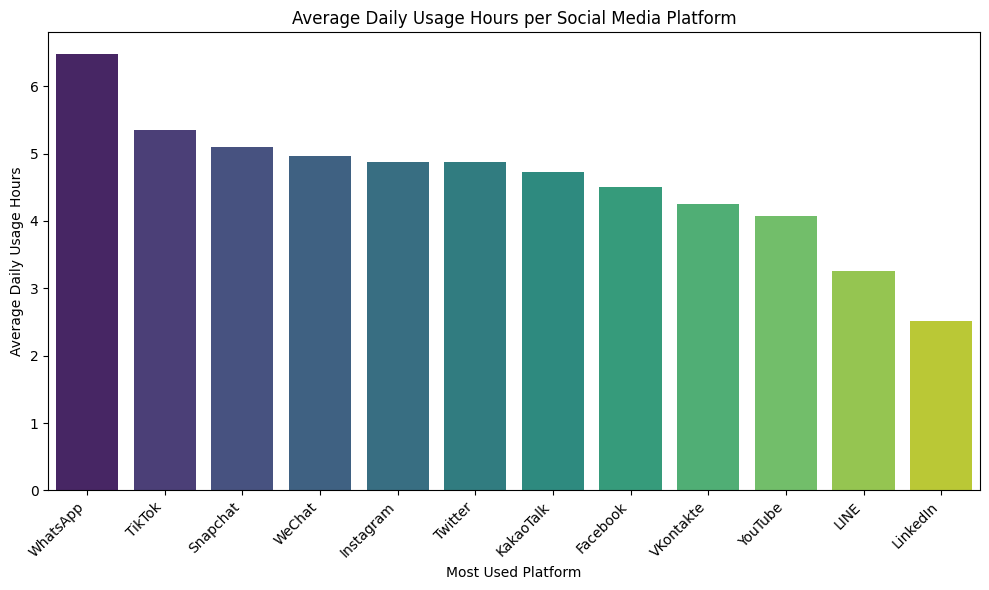

In [ ]:
# Calculate the average daily usage hours for each platform
platform_usage = students_social_media.groupby('Most_Used_Platform')['Avg_Daily_Usage_Hours'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_usage.index, y=platform_usage.values, palette='viridis')
plt.title('Average Daily Usage Hours per Social Media Platform')
plt.xlabel('Most Used Platform')
plt.ylabel('Average Daily Usage Hours')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

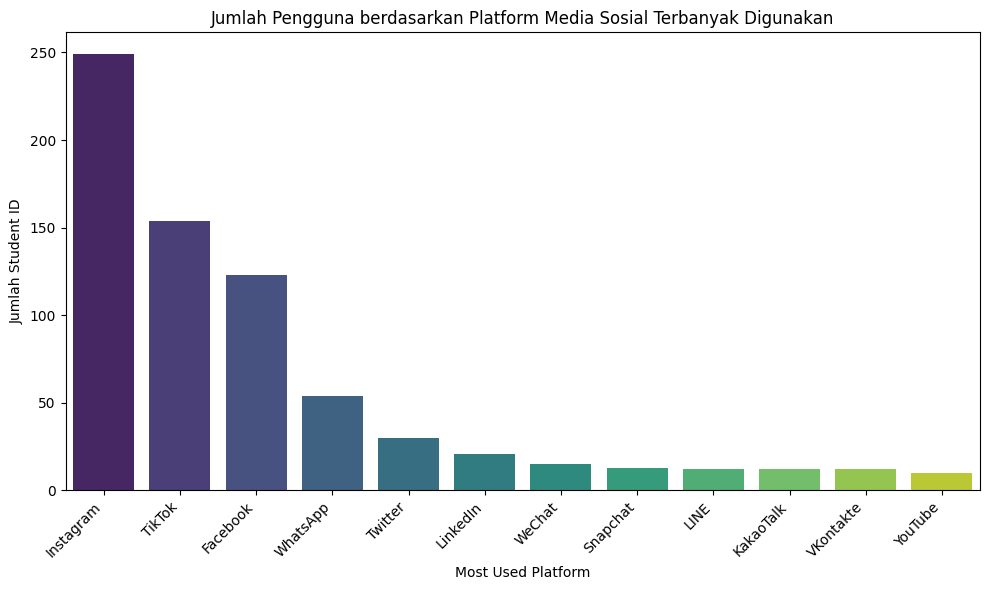

In [ ]:
platform_student_count = students_social_media.groupby('Most_Used_Platform')['Student_ID'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=platform_student_count.index, y=platform_student_count.values, hue=platform_student_count.index, palette='viridis', legend=False)
plt.title('Jumlah Pengguna berdasarkan Platform Media Sosial Terbanyak Digunakan')
plt.xlabel('Most Used Platform')
plt.ylabel('Jumlah Student ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
platform_student_count = students_social_media.groupby('Most_Used_Platform')['Student_ID'].count().sort_values(ascending=False)

print("Jumlah Pengguna berdasarkan Platform Media Sosial Terbanyak Digunakan:")
display(platform_student_count.reset_index().rename(columns={'Student_ID': 'Jumlah Pengguna', 'Most_Used_Platform': 'Platform Media Sosial'}))

# Save the data to a CSV file
platform_student_count.to_csv('platform_student_count.csv')
print("Data telah disimpan ke platform_student_count.csv")

Jumlah Pengguna berdasarkan Platform Media Sosial Terbanyak Digunakan:


,Platform Media Sosial,Jumlah Pengguna
0,Instagram,249
1,TikTok,154
2,Facebook,123
3,WhatsApp,54
4,Twitter,30
5,LinkedIn,21
6,WeChat,15
7,Snapchat,13
8,LINE,12
9,KakaoTalk,12


Data telah disimpan ke platform_student_count.csv


###Average Daily Social Media Usage Duration by Academic Level

/tmp/ipython-input-711864059.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=academic_usage.index, y=academic_usage.values, palette='viridis')


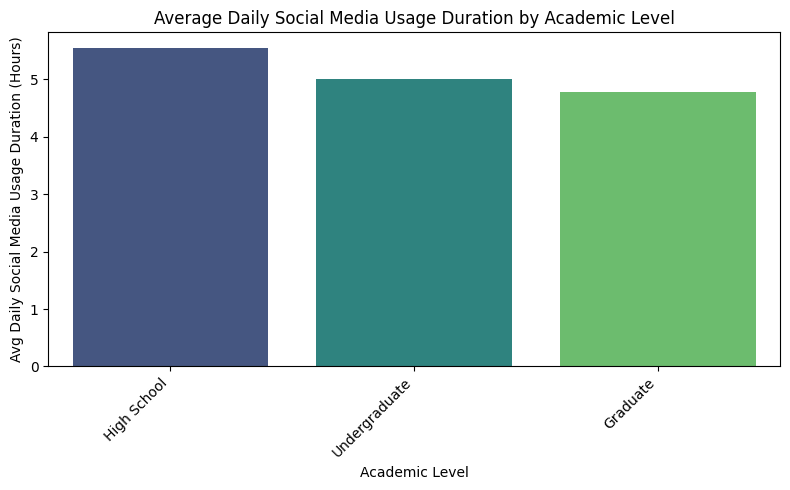

Avg Daily Social Media Usage Duration by Academic Level:
                Avg_Daily_Usage_Hours
Academic_Level                       
High School                  5.544444
Undergraduate                5.001416
Graduate                     4.776923


In [ ]:
# Calculating the average daily social media usage duration by academic level
academic_usage = students_social_media.groupby('Academic_Level')['Avg_Daily_Usage_Hours'].mean().sort_values(ascending=False)

# Creating a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=academic_usage.index, y=academic_usage.values, palette='viridis')
plt.title('Average Daily Social Media Usage Duration by Academic Level')
plt.xlabel('Academic Level')
plt.ylabel('Avg Daily Social Media Usage Duration (Hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Showing the Data
print("Avg Daily Social Media Usage Duration by Academic Level:")
print(pd.DataFrame(academic_usage))

###Average Daily Social Media Usage Duration by Gender

/tmp/ipython-input-2768689669.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_usage.index, y=gender_usage.values, palette='viridis')


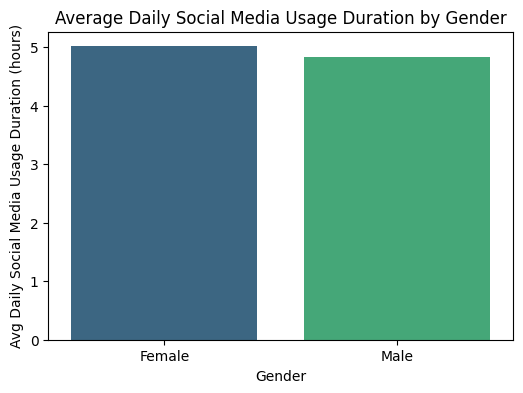

In [ ]:
# Calculating the average daily social media usage duration by gender
gender_usage = students_social_media.groupby('Gender')['Avg_Daily_Usage_Hours'].mean().sort_values(ascending=False)

# Creating a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_usage.index, y=gender_usage.values, palette='viridis')
plt.title('Average Daily Social Media Usage Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg Daily Social Media Usage Duration (hours)')
plt.show()

###Average Daily Social Media Usage Duration by Age Category


Distribution of Age_Category:
Age_Category
Mid-Level         321
Senior Level      207
Freshman Level    177
Name: count, dtype: int64

First Five Lines of Data:
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No   

/tmp/ipython-input-1879446518.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_usage_by_age_category = students_social_media.groupby('Age_Category')['Avg_Daily_Usage_Hours'].mean().reset_index()


,Age_Category,Avg_Daily_Usage_Hours
0,Freshman Level,5.141243
1,Mid-Level,4.940187
2,Senior Level,4.695169


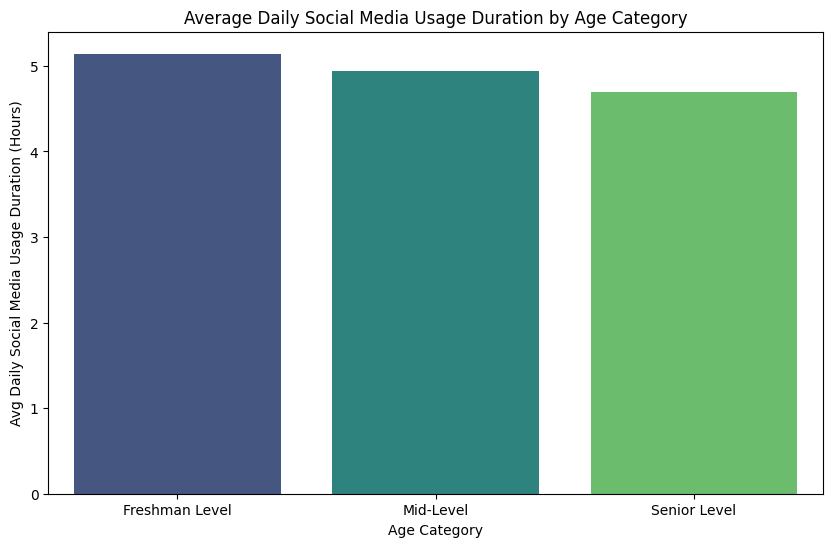

In [ ]:
# Define the bins and labels for Age_Category
bins = [17, 19, 21, 24]
labels = ['Freshman Level', 'Mid-Level', 'Senior Level']

# Create the new 'Age_Category' column
students_social_media['Age_Category'] = pd.cut(students_social_media['Age'], bins=bins, labels=labels, right=True)

# Display the distribution of the new Age_Category column
print("\nDistribution of Age_Category:")
print(students_social_media['Age_Category'].value_counts())

print("\nFirst Five Lines of Data:")
print(students_social_media.head())

# Display the Result in Table Format
average_usage_by_age_category = students_social_media.groupby('Age_Category')['Avg_Daily_Usage_Hours'].mean().reset_index()
print("Average Daily Social Media Usage Duration by Age Category:")
display(average_usage_by_age_category)

# Distribution of Average Daily Social Media Based on Age Category
plt.figure(figsize=(10, 6))
sns.barplot(data=students_social_media, x='Age_Category', y='Avg_Daily_Usage_Hours', hue='Age_Category', palette='viridis', legend=False, errorbar=None)
plt.title('Average Daily Social Media Usage Duration by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Avg Daily Social Media Usage Duration (Hours)')
plt.show()

###Number of Students Analyzed in Each Country

In [ ]:
country_student_count = students_social_media.groupby('Country')['Student_ID'].count().sort_values(ascending=False)
print("Number of Students Analyzed in Each Country:")
print(country_student_count)

Number of Students Analyzed in Each Country:
Country
India           53
USA             40
Canada          34
Denmark         27
Ireland         27
                ..
Uzbekistan       1
Vatican City     1
Venezuela        1
Vietnam          1
Yemen            1
Name: Student_ID, Length: 110, dtype: int64


#### Because the number of samples (students) in each country was different, the analysis focused on global trends.

##Section 2: Impact Analysis

###Impact of Social Media Usage in Academic Performance

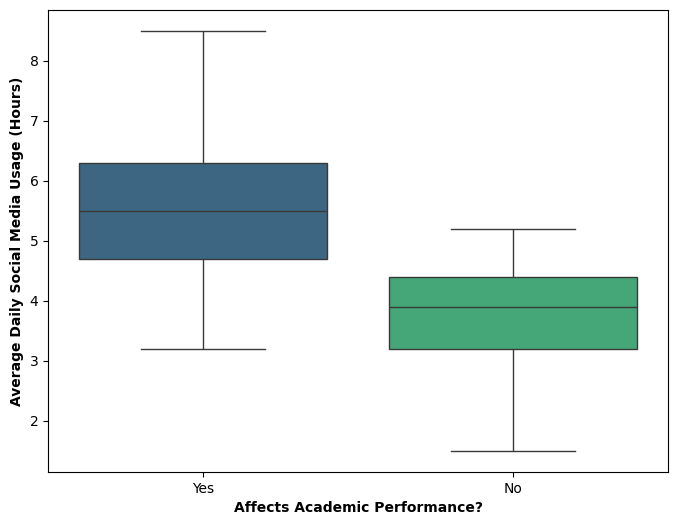

In [ ]:
# Creating a box plot to compare Avg_Daily_Usage_Hours and Affects_Academic_Performance
plt.figure(figsize=(8, 6))
sns.boxplot(data=students_social_media, x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', hue='Affects_Academic_Performance', palette='viridis', legend=False)
#plt.title('Average Daily Usage Hours vs. Affects Academic Performance')
plt.xlabel('Affects Academic Performance?', fontweight='bold')
plt.ylabel('Average Daily Social Media Usage (Hours)', fontweight='bold')
plt.show()

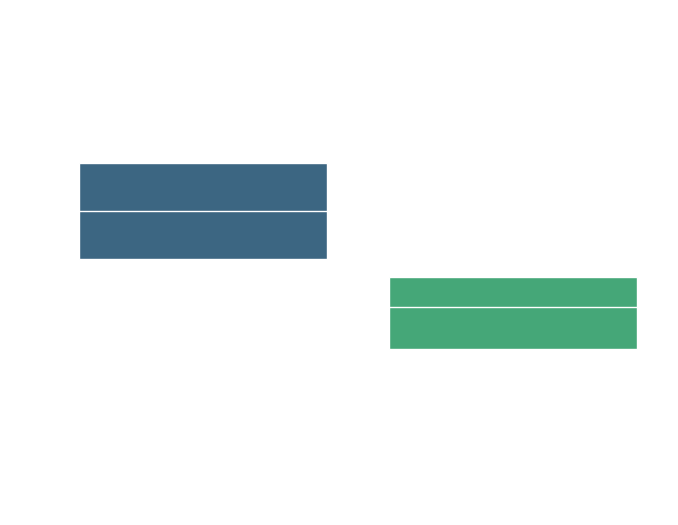

In [ ]:
# Creating Slide-Friendly version of Boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to compare Avg_Daily_Usage_Hours and Affects_Academic_Performance
fig, ax = plt.subplots(figsize=(8, 6))

# Set figure and axes background to transparent
fig.patch.set_alpha(0) # For transparent figure background
ax.patch.set_alpha(0) # For transparent axes background

sns.boxplot(data=students_social_media, x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', hue='Affects_Academic_Performance', palette='viridis', legend=False, ax=ax,
            boxprops=dict(edgecolor='white'),
            medianprops=dict(color='white'),
            whiskerprops=dict(color='white'),
            capprops=dict(color='white'))

# Set title, labels, and tick colors to white
ax.set_xlabel('Affects Academic Performance?', fontweight='bold', color='white')
ax.set_ylabel('Average Daily Social Media Usage (Hours)', fontweight='bold', color='white')

# Set tick labels color to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set spine colors to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

plt.show()

In [ ]:
# Display the Result in Table Format (Interpreting data in the boxplot)
academic_performance_summary = students_social_media.groupby('Affects_Academic_Performance')['Avg_Daily_Usage_Hours'].describe()
print("Summary Statistics of Average Daily Usage Hours by Academic Performance:")
display(academic_performance_summary)

Summary Statistics of Average Daily Usage Hours by Academic Performance:


,count,mean,std,min,25%,50%,75%,max
Affects_Academic_Performance,,,,,,,,
No,252.0,3.804365,0.765400,1.5,3.2,3.9,4.4,5.2
Yes,453.0,5.538631,1.029428,3.2,4.7,5.5,6.3,8.5


###Impact of Social Media Usage in Sleep Duration and Mental Health (1. Heatmap)

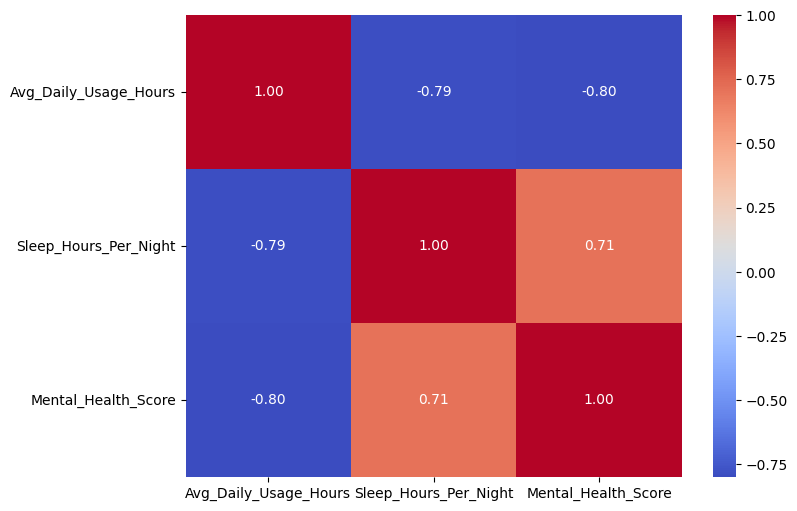

In [ ]:
# Selecting the relevant columns for correlation analysis
correlation_data = students_social_media[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score']]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap of Social Media Usage, Sleep, and Mental Health')
plt.show()

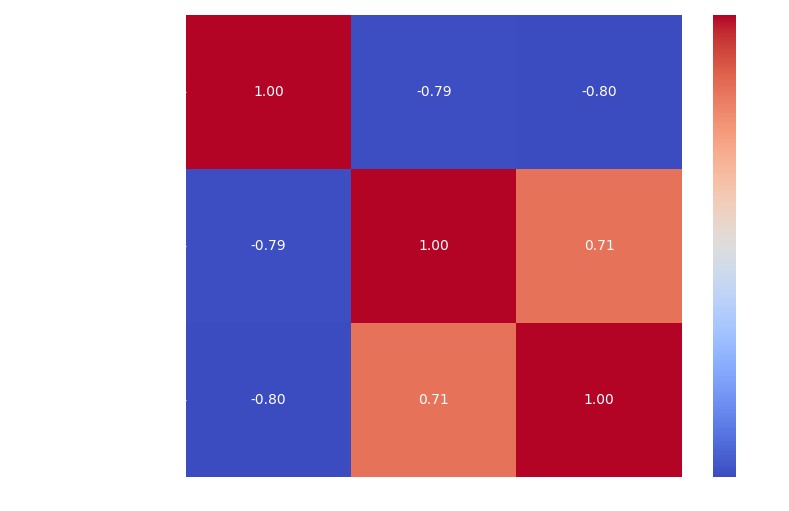

In [ ]:
# Creating Slide-Friendly version of Heatmap

# Select the relevant columns for correlation analysis
correlation_data = students_social_media[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(8, 6))

# Set figure and axes background to transparent
fig.patch.set_alpha(0) # For transparent figure background
ax.patch.set_alpha(0) # For transparent axes background

# Add cbar_kws to control colorbar properties
cbar_kws = {"ticks": [-1, -0.5, 0, 0.5, 1]} # You can customize ticks if needed

hm = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax, annot_kws={"color": "white"}, cbar_kws=cbar_kws)

# Set title, labels, and tick colors to white
#ax.set_title('Correlation Heatmap of Social Media Usage, Sleep, and Mental Health', color='white')
#ax.set_xlabel('Variables', fontweight='bold', color='white')
#ax.set_ylabel('Variables', fontweight='bold', color='white')

# Set tick labels color to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set colorbar tick labels color to white
hm.collections[0].colorbar.ax.tick_params(colors='white')

# Set spine colors to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

plt.show()

###Impact of Social Media Usage in Sleep Duration and Mental Health (2. Barchart)


Distribution of Avg_Daily_Usage_Category:
Avg_Daily_Usage_Category
Low         169
Moderate    393
High        143
Name: count, dtype: int64

First Five Lines of Data with new Avg_Daily_Usage_Category:
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3           

/tmp/ipython-input-3528046825.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sleep_by_usage_category = students_social_media.groupby('Avg_Daily_Usage_Category')['Sleep_Hours_Per_Night'].mean().reindex(['Low', 'Moderate', 'High'])
/tmp/ipython-input-3528046825.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_sleep_by_usage_category.index, y=average_sleep_by_usage_category.values, palette='viridis')


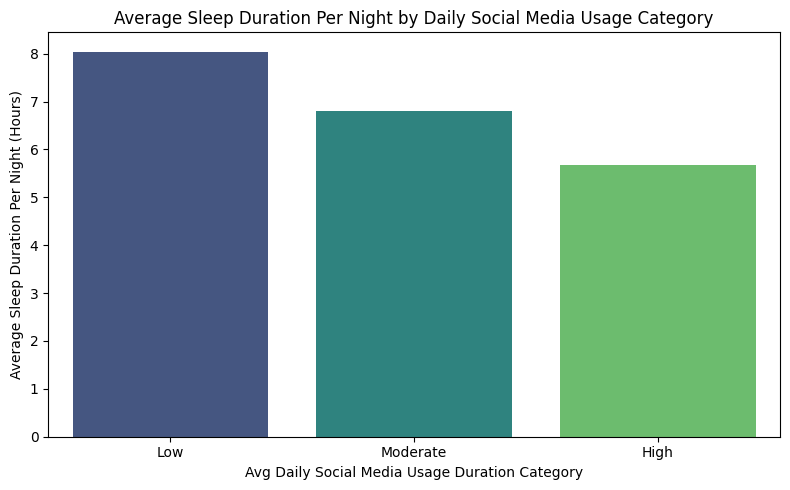

Average Sleep Duration per Night based on Daily Social Media Usage Duration Category:


,Sleep_Hours_Per_Night
Avg_Daily_Usage_Category,
Low,8.044379
Moderate,6.800763
High,5.667133


In [ ]:
# Categorizing Daily Social Media Usage Duration (Hours)
# Based on the descriptive statistics (min: 1.5, max: 8.5, mean: 4.9, 25%: 4.1, 50%: 4.8, 75%: 5.8)
# Let's set the bins as follows to create roughly balanced categories if possible or logically sound ones:
# Low: up to 4 hours
# Moderate: 4 to 6 hours
# High: above 6 hours

min_usage = students_social_media['Avg_Daily_Usage_Hours'].min()
max_usage = students_social_media['Avg_Daily_Usage_Hours'].max()

bins = [min_usage - 0.01, 4.0, 6.0, max_usage + 0.01] # -0.01 and +0.01 to ensure min/max values are included correctly
labels = ['Low', 'Moderate', 'High']

# Create the new 'Avg_Daily_Usage_Category' column
students_social_media['Avg_Daily_Usage_Category'] = pd.cut(
    students_social_media['Avg_Daily_Usage_Hours'],
    bins=bins,
    labels=labels,
    right=True # This means (4.0, 6.0] for Moderate, etc.
)

# Display the distribution of the new Avg_Daily_Usage_Category column
print("\nDistribution of Avg_Daily_Usage_Category:")
print(students_social_media['Avg_Daily_Usage_Category'].value_counts().sort_index())

# Display the first few lines of data with the new column
print("\nFirst Five Lines of Data with new Avg_Daily_Usage_Category:")
print(students_social_media.head())

# Calculating the average sleep hours per night for each Avg_Daily_Usage_Category
average_sleep_by_usage_category = students_social_media.groupby('Avg_Daily_Usage_Category')['Sleep_Hours_Per_Night'].mean().reindex(['Low', 'Moderate', 'High'])

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=average_sleep_by_usage_category.index, y=average_sleep_by_usage_category.values, palette='viridis')
plt.title('Average Sleep Duration Per Night by Daily Social Media Usage Category')
plt.xlabel('Avg Daily Social Media Usage Duration Category')
plt.ylabel('Average Sleep Duration Per Night (Hours)')
plt.tight_layout()
plt.show()

# Display a Result in Table Format
print("Average Sleep Duration per Night based on Daily Social Media Usage Duration Category:")
display(pd.DataFrame(average_sleep_by_usage_category))

Avg Daily Social Media Usage Category:
*   Low: <= 4 Hours
*   Moderate: 4-6 Hours
*   High: > 6 Hours

##Section 3: Correlations and Insights

### Correlation Matrix: Quantitative relationships between variables

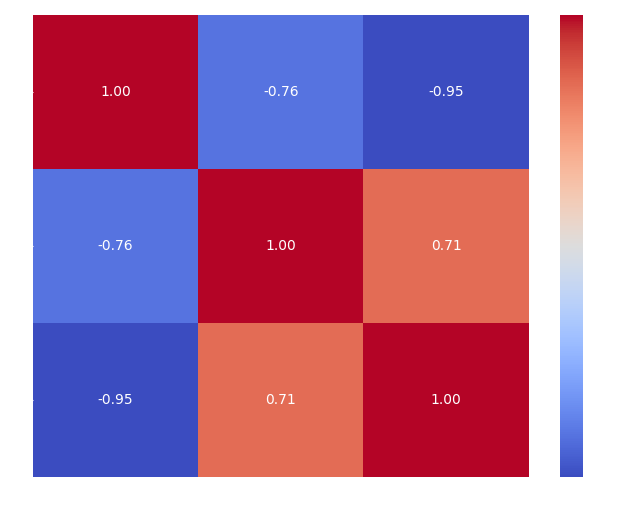

In [ ]:
# Creating a Slide-Friendly version of Heatmap
# Selecting the relevant columns for correlation analysis
correlation_data_specific = students_social_media[['Addicted_Score', 'Sleep_Hours_Per_Night', 'Mental_Health_Score']]

# Calculate the correlation matrix
correlation_matrix_specific = correlation_data_specific.corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(8, 6))

# Set figure and axes background to transparent
fig.patch.set_alpha(0) # For transparent figure background
ax.patch.set_alpha(0) # For transparent axes background

# Add cbar_kws to control colorbar properties
cbar_kws = {"ticks": [-1, -0.5, 0, 0.5, 1]} # You can customize ticks if needed

hm = sns.heatmap(correlation_matrix_specific, annot=True, cmap='coolwarm', fmt=".2f", ax=ax, annot_kws={"color": "white"}, cbar_kws=cbar_kws)

# Set title, labels, and tick colors to white
#ax.set_title('Correlation Heatmap: Addicted Score, Sleep Hours, Mental Health', color='white')
#ax.set_xlabel('Variables', fontweight='bold', color='white', fontsize=10)
#ax.set_ylabel('Variables', fontweight='bold', color='white', fontsize=10)

# Set tick labels color to white and decrease labelsize
ax.tick_params(axis='x', colors='white', labelsize=9)
ax.tick_params(axis='y', colors='white', labelsize=9)

# Set colorbar tick labels color to white
hm.collections[0].colorbar.ax.tick_params(colors='white')

# Set spine colors to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

plt.show()

### Effects of Social Media Addiction to Academic Performance

/tmp/ipython-input-2825915852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Affects_Academic_Performance', y='Addicted_Score', data=academic_performance_addiction, palette='viridis')


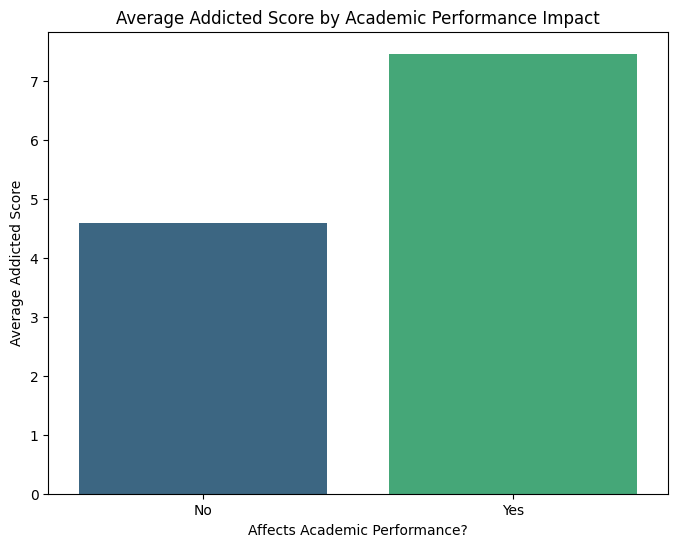

Average Addicted Score by Academic Performance Impact:
  Affects_Academic_Performance  Addicted_Score
0                           No        4.595238
1                          Yes        7.461369


In [ ]:
# Calculating the average Addicted_Score for each Affects_Academic_Performance category
academic_performance_addiction = students_social_media.groupby('Affects_Academic_Performance')['Addicted_Score'].mean().reset_index()

# Creating a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Affects_Academic_Performance', y='Addicted_Score', data=academic_performance_addiction, palette='viridis')
plt.title('Average Addicted Score by Academic Performance Impact')
plt.xlabel('Affects Academic Performance?')
plt.ylabel('Average Addicted Score')
plt.show()

# Displaying data from the chart
print("Average Addicted Score by Academic Performance Impact:")
print(academic_performance_addiction)

This graph shows the average ‘Addicted Score’ based on how social media use affects students’ academic performance (Affects_Academic_Performance). There are two main categories:

*   ‘No’: Students’ academic performance is not affected by social media usage.
*   ‘Yes’: Students' academic performance is affected by social media usage.

From the chart and summary data presented:

Students who have not been affected by social media in their academic performance have an average ‘Addicted Score’ around 4.60. Students who have been affected academically by social media have a much higher average ‘Addicted Score’ around 7.46. In conclusion, there is a strong correlation between higher levels of social media addiction and a negative impact on academic performance. Students with higher addiction scores are more likely to have issues with their academic performance due to social media usage.

### Influence of Addiction on Involvement in Conflicts

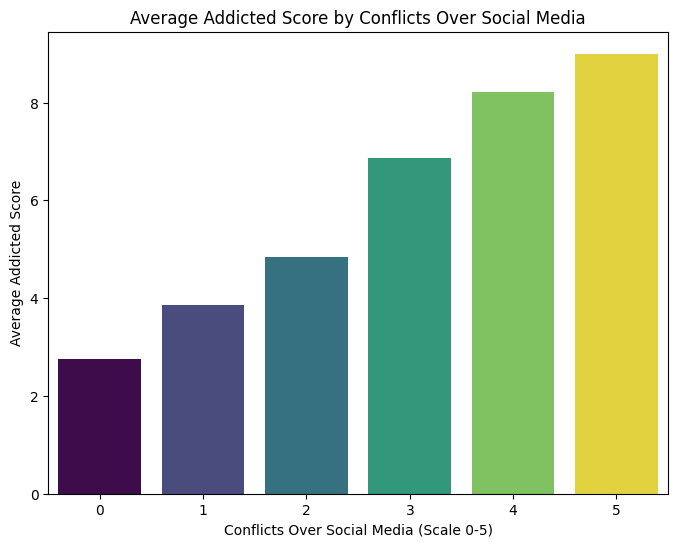

Average Addicted Score by Conflicts Over Social Media:
   Conflicts_Over_Social_Media  Addicted_Score
0                            0        2.750000
1                            1        3.851064
2                            2        4.848039
3                            3        6.862069
4                            4        8.224138
5                            5        9.000000


In [ ]:
# Calculating the average Addicted_Score for each Conflicts_Over_Social_Media level
conflicts_addiction = students_social_media.groupby('Conflicts_Over_Social_Media')['Addicted_Score'].mean().reset_index()

# Creating a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Conflicts_Over_Social_Media', y='Addicted_Score', data=conflicts_addiction, hue='Conflicts_Over_Social_Media', palette='viridis', legend=False)
plt.title('Average Addicted Score by Conflicts Over Social Media')
plt.xlabel('Conflicts Over Social Media (Scale 0-5)')
plt.ylabel('Average Addicted Score')
plt.show()

print("Average Addicted Score by Conflicts Over Social Media:")
print(conflicts_addiction)

#Another Analysis

### Predictive/Correlational Exploration

Using Pearson Correlation (correlation between 'Addicted_Score' and other relevant numerical variables)

The Pearson correlation coefficients and regression plots for 'Addicted_Score' against 'Avg_Daily_Usage_Hours' and 'Conflicts_Over_Social_Media' have been generated.

Pearson Correlation Matrix with Addicted_Score:
Addicted_Score                 1.000000
Conflicts_Over_Social_Media    0.933586
Avg_Daily_Usage_Hours          0.832000
Age                           -0.166396
Sleep_Hours_Per_Night         -0.764858
Mental_Health_Score           -0.945051
Name: Addicted_Score, dtype: float64


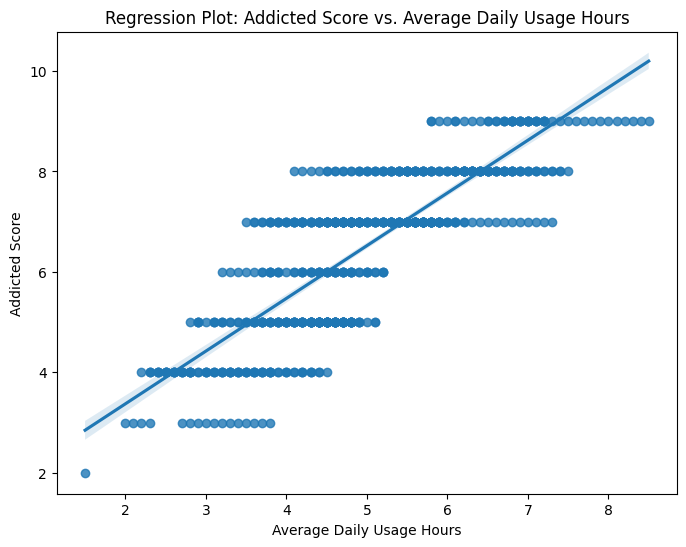

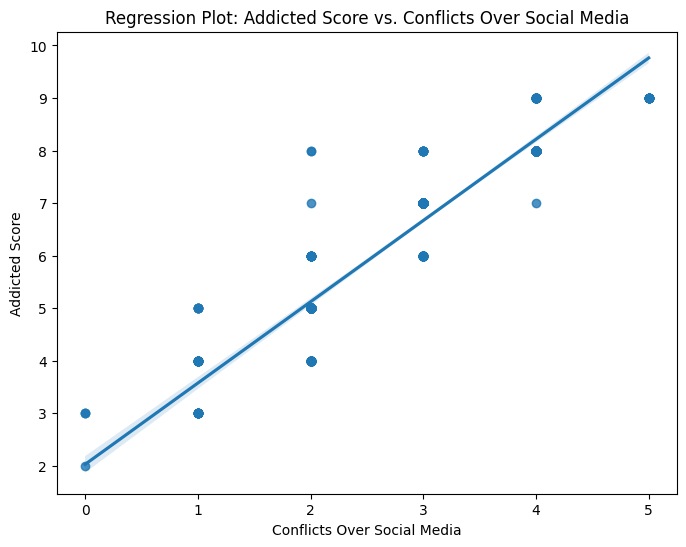

In [ ]:
# Select numerical columns including Addicted_Score
numerical_cols = students_social_media[['Addicted_Score', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Age', 'Conflicts_Over_Social_Media']]

# Calculate Pearson correlation matrix
pearson_corr = numerical_cols.corr(method='pearson')

print("Pearson Correlation Matrix with Addicted_Score:")
print(pearson_corr['Addicted_Score'].sort_values(ascending=False))

# Create a regression plot for Addicted_Score vs. Avg_Daily_Usage_Hours
plt.figure(figsize=(8, 6))
sns.regplot(data=students_social_media, x='Avg_Daily_Usage_Hours', y='Addicted_Score')
plt.title('Regression Plot: Addicted Score vs. Average Daily Usage Hours')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Addicted Score')
plt.show()

# Create a regression plot for Addicted_Score vs. Conflicts_Over_Social_Media
plt.figure(figsize=(8, 6))
sns.regplot(data=students_social_media, x='Conflicts_Over_Social_Media', y='Addicted_Score')
plt.title('Regression Plot: Addicted Score vs. Conflicts Over Social Media')
plt.xlabel('Conflicts Over Social Media')
plt.ylabel('Addicted Score')
plt.show()